https://bit.ly/FEML-5-PROB

# Влияние предобработки данных на модель

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [3]:
# Создаём сэмпл
n_samples = 1000

np.random.seed(9)
age_owner = np.random.choice(90, n_samples) + 21
length = np.random.choice(120, n_samples) + 15
width = np.random.choice(80, n_samples) + 10

price = length * width * 100 + 126

data = pd.DataFrame({
    'age_owner': age_owner,
    'length': length,
    'width': width,
    'price': price
})
data.head(5)

,age_owner,length,width,price
0,75,57,70,399126
1,77,39,60,234126
2,43,30,36,108126
3,86,30,68,204126
4,43,41,52,213326


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age_owner  1000 non-null   int32
 1   length     1000 non-null   int32
 2   width      1000 non-null   int32
 3   price      1000 non-null   int32
dtypes: int32(4)
memory usage: 15.8 KB


In [5]:
data.describe()

,age_owner,length,width,price
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,65.461000,74.375000,50.207000,3.709868e+05
std,25.728981,33.975708,22.682342,2.480216e+05
min,21.000000,15.000000,10.000000,2.212600e+04
25%,43.000000,45.000000,30.000000,1.681010e+05
50%,65.000000,73.000000,51.000000,3.106260e+05
75%,88.000000,103.000000,69.000000,5.228010e+05
max,110.000000,134.000000,89.000000,1.139126e+06


In [14]:
data.describe(percentiles=[0.1, 0.2, 0.9])

,age_owner,length,width,price,mult
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,65.461000,74.375000,50.207000,3.709868e+05,3708.608000
std,25.728981,33.975708,22.682342,2.480216e+05,2480.216004
min,21.000000,15.000000,10.000000,2.212600e+04,220.000000
10%,30.000000,28.000000,18.000000,1.000260e+05,999.000000
20%,38.000000,39.800000,26.000000,1.431260e+05,1430.000000
50%,65.000000,73.000000,51.000000,3.106260e+05,3105.000000
90%,102.000000,123.000000,81.000000,7.451960e+05,7450.700000
max,110.000000,134.000000,89.000000,1.139126e+06,11390.000000


In [6]:
data['length'].value_counts()

length
27     15
55     15
44     15
129    14
132    13
       ..
109     4
62      4
116     4
114     4
18      4
Name: count, Length: 120, dtype: int64

In [ ]:
sns.boxplot(data.length)

<Axes: >

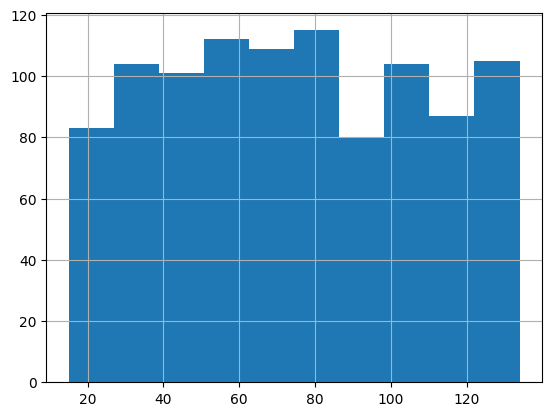

In [16]:
data['length'].hist(bins=10)

In [7]:
from sklearn.metrics import mean_absolute_error

X = data[['age_owner', 'length', 'width']]
y = data['price']


reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['age_owner', 'length', 'width']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-149.11046279 5071.76422338 7366.90372375]
Bias: -366334.8793674496
Error: 56547.37163550542


In [17]:
y.median(), y.mean()

(np.float64(310626.0), np.float64(370986.8))

In [9]:
X = data[['length', 'width']]
y = data['price']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['length', 'width']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [5073.23397859 7365.79408501]
Bias: -376149.4007836822
Error: 56518.60518237619


In [10]:
# Создаем новый признак
data['mult'] = data['length'] * data['width']
data.head(5)

,age_owner,length,width,price,mult
0,75,57,70,399126,3990
1,77,39,60,234126,2340
2,43,30,36,108126,1080
3,86,30,68,204126,2040
4,43,41,52,213326,2132


In [11]:
X = data[['mult']]
y = data['price']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [100.]
Bias: 126.0
Error: 5.82549546379596e-11


In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(
    degree=3,
    # include_bias=False,
    # interaction_only=True
)
X = poly.fit_transform(data[['age_owner', 'length', 'width']])
y = data['price']

poly.get_feature_names_out()

array(['1', 'age_owner', 'length', 'width', 'age_owner^2',
       'age_owner length', 'age_owner width', 'length^2', 'length width',
       'width^2', 'age_owner^3', 'age_owner^2 length',
       'age_owner^2 width', 'age_owner length^2',
       'age_owner length width', 'age_owner width^2', 'length^3',
       'length^2 width', 'length width^2', 'width^3'], dtype=object)

In [13]:
reg_poly = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg_poly.coef_))
print('Bias: {}'.format(reg_poly.intercept_))

pred_values = reg_poly.predict(X)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [ 0.00000000e+00 -6.41442455e-12  2.84757981e-12  1.22887117e-12
 -6.35047570e-14  5.24025268e-14  6.61692923e-14 -1.42108547e-14
  1.00000000e+02 -3.55271368e-15]
Bias: 126.00000000011642
Error: 1.8728314898908137e-10


# **Дополнительные материалы**
1. Типы данных https://youtu.be/c4Cg3TUIH0E 
2. Метрика ROC-AUC https://youtu.be/v6PPG8J_Egs
3. Метрика F1-score https://youtu.be/PeE3Fkt5W3Q
4. Масштабирование данных (StandartScaler, MinMaxScaler) https://youtu.be/XsuCOfpf8Ic